In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from logistic_reggression import LogisticRegression

In [11]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

grouped_age = df.groupby(['Pclass', 'Sex'])['Age'].median()

def fill_age(x):
    if np.isnan(x['Age']):
        return grouped_age[x['Pclass'], x['Sex']]
    return x['Age']

df['Age'] = df.apply(fill_age, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

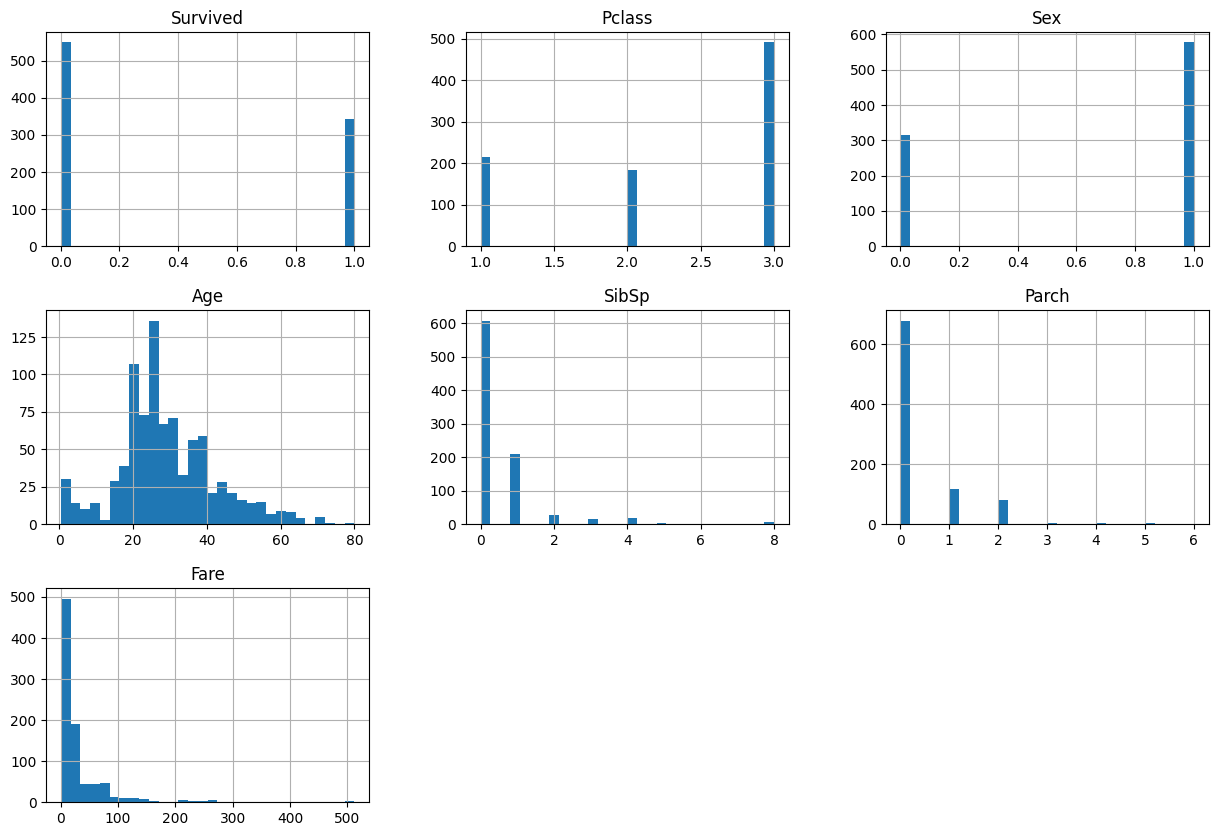

In [13]:
df.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

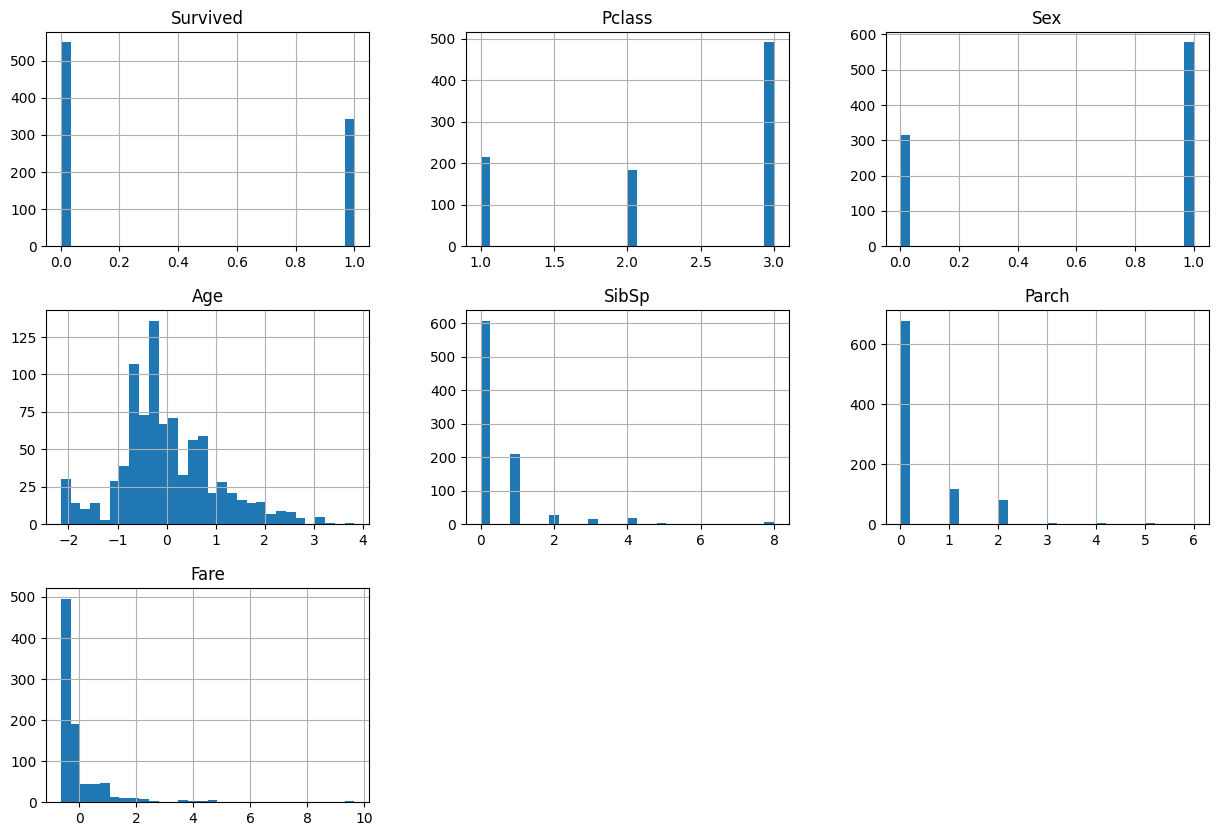

In [14]:
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
df.hist(bins=30, figsize=(15, 10))

In [15]:
samples_amount = 0.3
random_state = 526973

x = df.drop('Survived', axis=1)
y = df['Survived']

test_x = x.sample(frac=samples_amount, random_state=random_state)
test_y = y[test_x.index]
train_x = x.drop(test_x.index, axis=0)
train_y = y[train_x.index]

In [16]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from time import time
import warnings
warnings.filterwarnings('ignore')

# Grid-Search
epochs_x = np.array(list(range(1, 50)))
lr_x = np.linspace(0.0001, 0.999, 25)
batch_size_x = np.array(list(range(10, 21)))

print(f"Testing {len(epochs_x) * len(lr_x) * len(batch_size_x)} cases:")

start = time()

best_params_scr = 0
best_params = {}
i = 1
for epochs in epochs_x:
    for lr in lr_x:
        for batch_size in batch_size_x:
            case_start = time()

            log_reg = LogisticRegression()
            log_reg.fit(train_x, train_y, epochs, lr, batch_size)
            pred_y = log_reg.predict(test_x)
            scr = accuracy_score(test_y, pred_y)

            if scr > best_params_scr:
                best_params_scr = scr
                best_params = {
                    "epochs": epochs,
                    "lr": lr,
                    "batch_size": batch_size
                }

            print(f"Case {i} finished in {time() - case_start}")
            i += 1

print(f"Finished in {time() - start} second(s)")

Testing 13475 cases:
Case 1 finished in 0.010054349899291992
Case 2 finished in 0.00805211067199707
Case 3 finished in 0.007533550262451172
Case 4 finished in 0.010753631591796875
Case 5 finished in 0.0066945552825927734
Case 6 finished in 0.007225990295410156
Case 7 finished in 0.006319522857666016
Case 8 finished in 0.006021738052368164
Case 9 finished in 0.007342338562011719
Case 10 finished in 0.005883932113647461
Case 11 finished in 0.005942344665527344
Case 12 finished in 0.010300874710083008
Case 13 finished in 0.009921073913574219
Case 14 finished in 0.007322788238525391
Case 15 finished in 0.007115840911865234
Case 16 finished in 0.008449554443359375
Case 17 finished in 0.005651950836181641
Case 18 finished in 0.007776021957397461
Case 19 finished in 0.005822420120239258
Case 20 finished in 0.007475376129150391
Case 21 finished in 0.00579833984375
Case 22 finished in 0.0053234100341796875
Case 23 finished in 0.008428335189819336
Case 24 finished in 0.007517814636230469
Case 25